## Clustering

The clustering algorithm is a set of techniques used to group data entries into a number of clusters. Within each cluster, data points have more similarity than those in other clusters. The technique is used to identify and unify data points, and the information can be utilized in researching patterns and evaluating strategies, such as text sentiment detection, customer marketing segmentation, financial investment, etc. The most popular clustering algorithms include k-means, hierarchical, and DBSCAN models.
 
The dataset 'Music Survey Cleaned' is grouped by 'Music Effects'. It records data such as age, hours of playing music, evaluations of individual mental health issues, and how playing music affected their well-being. Assuming people's bias on music effects skewed the dataset, the goal is to regroup the dataset by using k-means, DBSCAN, and hierarchical clustering.

Reference:
 - ANLY501 Lab 5.2
 - https://medium.com/grabngoinfo/4-clustering-model-algorithms-in-python-and-which-is-the-best-7f3431a6e624

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv('../../data/cleaned data/Music Survey Cleaned.csv')
df = df.drop('Unnamed: 0',axis = 1)

In [3]:
# reconfigure data values for further analysis

print('Dataframe Columns:',df.columns)
df = df.replace('I do not use a streaming service.','N/A')
df = df.replace('Other streaming service','Others')
print('Primary streaming service labels:',df['Primary streaming service'].unique())
print('Music effects labels:',df['Music effects'].unique())

Dataframe Columns: Index(['Age', 'Primary streaming service', 'Hours per day', 'Anxiety',
       'Depression', 'Insomnia', 'OCD', 'Music effects'],
      dtype='object')
Primary streaming service labels: ['Spotify' 'YouTube Music' 'N/A' 'Apple Music' 'Others' 'Pandora']
Music effects labels: ['No effect' 'Improve' 'Worsen']


<AxesSubplot:xlabel='Depression', ylabel='count'>

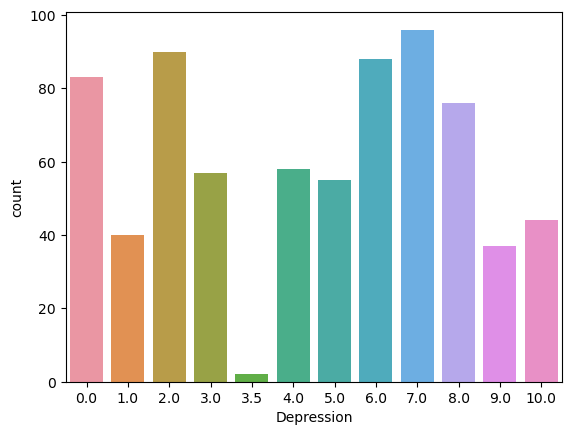

In [4]:
sns.countplot(x = 'Depression', data = df)

<AxesSubplot:xlabel='Anxiety', ylabel='count'>

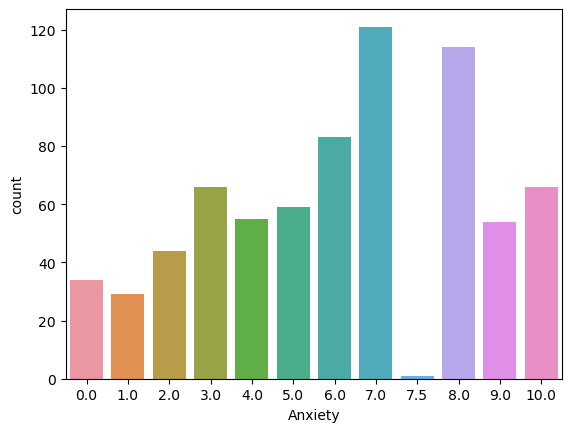

In [5]:
sns.countplot(x = 'Anxiety', data = df)

<AxesSubplot:xlabel='Music effects', ylabel='count'>

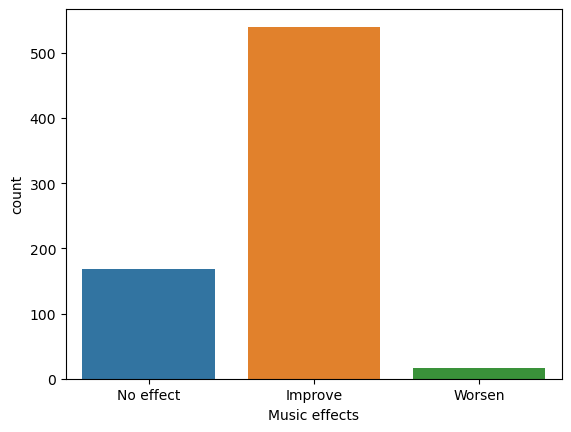

In [6]:
sns.countplot(x = 'Music effects', data = df)

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

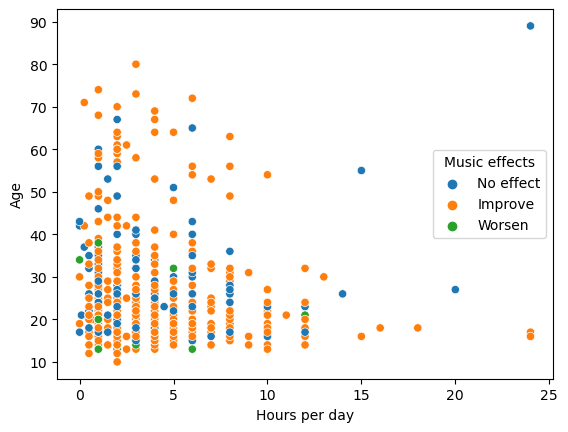

In [7]:
# original dataset clustered by 'Music effects: No effect, Improve, Worsen'
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df)


In [8]:
df['Primary streaming service'] = df['Primary streaming service'].astype('category').cat.codes
df['Music effects'] = df['Music effects'].astype('category').cat.codes
df

,Age,Primary streaming service,Hours per day,Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,4,4.0,7.0,7.0,10.0,2.0,1
1,61.0,5,2.5,9.0,7.0,3.0,3.0,0
2,18.0,4,4.0,7.0,2.0,5.0,9.0,0
3,18.0,4,5.0,8.0,8.0,7.0,7.0,0
4,18.0,5,3.0,4.0,8.0,6.0,0.0,0
...,...,...,...,...,...,...,...,...
721,17.0,4,2.0,7.0,6.0,0.0,9.0,0
722,18.0,4,1.0,3.0,2.0,2.0,5.0,0
723,19.0,2,6.0,2.0,2.0,2.0,2.0,0
724,19.0,4,5.0,2.0,3.0,2.0,1.0,0


In [9]:
# seperate the dataset into features and target, and split them into training set and testing set
X = df.drop(['Music effects'],axis=1)
y = df['Music effects']

#standardization
normalize = StandardScaler()
normalize.fit(X)
X = normalize.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#### K-Means Clustering

K-Means clustering uses the distance between a data point and the center of te cluster to group data. Dataset will be split into k groups based on data points' proximity. For K-means clustering, I use the elbow method to find the optimal number of clusters. First, I pre-process the featured variables.

In [10]:
distortion = []
inertias = []
k = 10

for k in range(1,k):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X)

    distortion.append(sum(np.min(cdist(X,kmeans.cluster_centers_, 'euclidean'), axis = 1)) / X.shape[0])
    inertias.append(kmeans.inertia_)
    evaluation = pd.DataFrame.from_records({'Cluster':np.arange(1,k+1),'Distortion':distortion,'Inertia':inertias})

evaluation

,Cluster,Distortion,Inertia
0,1,2.495406,5082.000000
1,2,2.204869,4042.292450
2,3,2.080931,3564.819095
3,4,1.957361,3173.550316
4,5,1.859111,2882.750353
5,6,1.792267,2636.833169
6,7,1.727292,2474.544569
7,8,1.683709,2352.212566
8,9,1.641272,2253.129118


<AxesSubplot:xlabel='Cluster', ylabel='Inertia'>

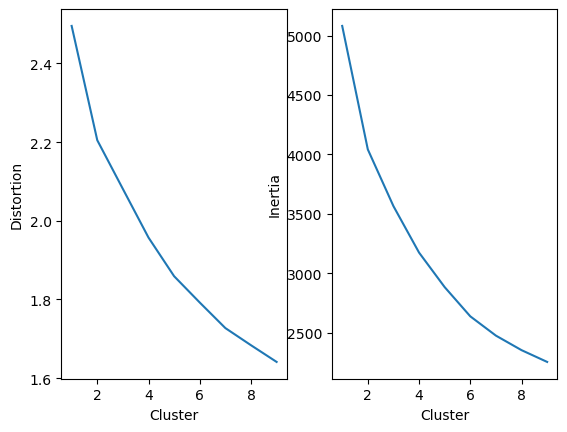

In [11]:
# use the elbow method to find the optimal number of clusters
# use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center
fig, ax = plt.subplots(1,2)
sns.lineplot(x = 'Cluster', y = 'Distortion', data = evaluation,ax=ax[0])
sns.lineplot(x = 'Cluster', y = 'Inertia', data = evaluation,ax=ax[1])

# optimal K = 3

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

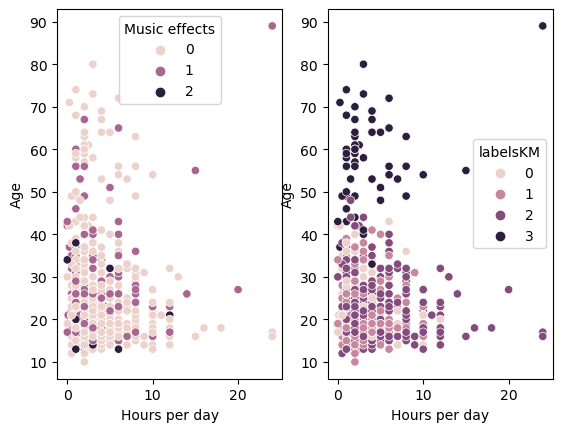

In [12]:
bestK = KMeans(n_clusters=4, init='k-means++')
labelsKM =bestK.fit_predict(X)
df['labelsKM'] = labelsKM
fig, ax = plt.subplots(1,2)
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df, ax=ax[0])
sns.scatterplot(x= 'Hours per day', y = 'Age',hue='labelsKM',data=df, ax=ax[1])

#optimal number of clusters = 4

#### DBSCAN Clustering

DBSCAN clustering uses a density-based algorithm to separate high-density regions from low-density regions. The algorithm is best used for datasets fairly even-distributed with multiple clusters. This dataset has a singular dense cluster, which I believe isn't optimal for DBSCAN.

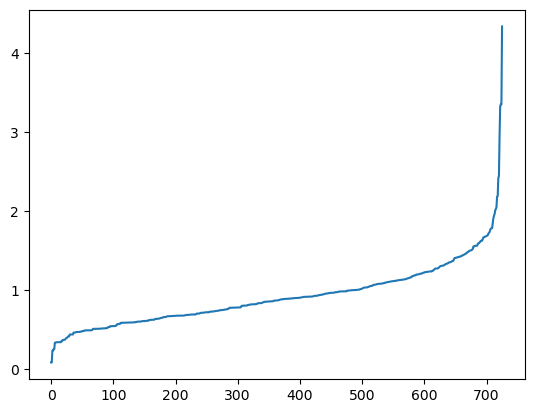

In [13]:
# DBSCAN requires two parameters: Epsilon and MinPoints. 
# Epsilon is the distance between two closest data points.
# MinPoints is the minimum data points in a cluster.

neighb = NearestNeighbors(n_neighbors=2)
nbrs=neighb.fit(X)
distances,indices=nbrs.kneighbors(X)
distances = np.sort(distances, axis = 0)
distances = distances[:, 1] 
plt.plot(distances)
plt.show()

# Epsilon = 2

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

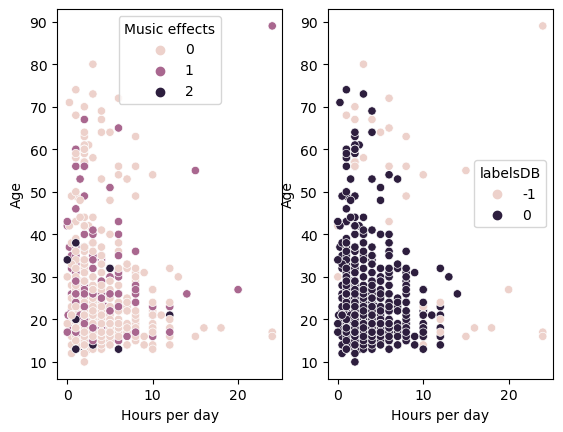

In [14]:
dbscan = DBSCAN(eps = 2, min_samples = 15).fit(X) # fitting the model
labelsDB = dbscan.labels_
df['labelsDB'] = labelsDB
fig, ax = plt.subplots(1,2)
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df, ax=ax[0])
sns.scatterplot(x= 'Hours per day', y = 'Age',hue='labelsDB',data=df, ax=ax[1])

# optimal number of clusters = 2
# K-Means clustering shows better results than DBSCAN clustering

#### Hierarchical Clustering
There are two approaches for hierarchical clustering: agglomerative clustering (bottom to top) and divisive clustering(top to bottom). For this dataset, I use agglomerative clustering. Each data points are initially considered an individual cluster. By analyzing the similarities among data points, clusters merge with each other until there's one cluster for the dataset. The algorithm places a dendrogram to visualize the process.

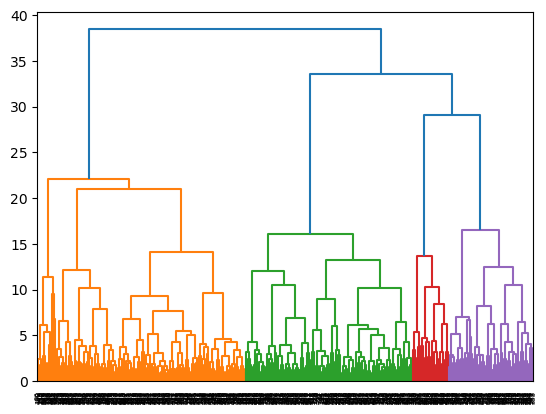

In [15]:
#visualize dendrogram to decide the number of clusters
dend = sch.dendrogram(sch.linkage(X, method='ward'))

<AxesSubplot:xlabel='Hours per day', ylabel='Age'>

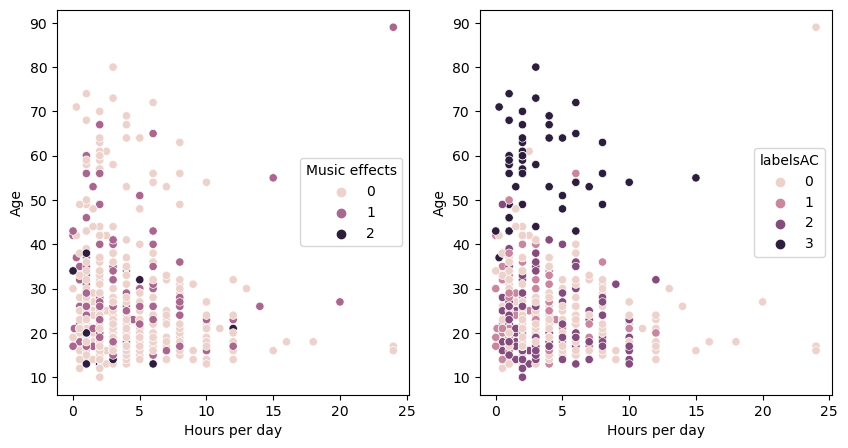

In [16]:
model = AgglomerativeClustering(n_clusters = 4).fit(X)
labelsAC = model.labels_
df['labelsAC'] = labelsAC
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.scatterplot(x= 'Hours per day', y = 'Age', hue = 'Music effects', data = df, ax=ax[0])
sns.scatterplot(x= 'Hours per day', y = 'Age',hue='labelsAC',data=df, ax=ax[1])

#optimal number of clusters = 4

#### Conclusion
For this dataset, I used K-Means, DBSCAN, and Hierarchial Clustering. By comparison, DBSCAN clustering isn't the best suitable option because it intuitively requires a dataset with a variety of density within. I think the agglomerative clustering approach has the optimal clustering pattern. While the density concentrates in one area, I can still distinguish between data points.